# Data Cleaning
In this step I am going to see what the telecom data lookslike and do data cleaning to make the data ready for modeling and analysing

In [2]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')
pd.set_option('max_column', None)

In [3]:
#import dataset
df=pd.read_excel('../data/Week1_challenge_data_source.xlsx',0)
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
df.shape

(150001, 55)

# Task 1- User Overview analysis
 

### top 10 handsets used by the customers

In [5]:
# function to identifiey top handsets and manufacturers
def top_N(df,col,n):
    top_n=df.groupby(col)
    top_n=top_n['MSISDN/Number'].nunique().nlargest(n)
    return top_n


In [6]:
#top 10 handsets used by the customers
top_ten_handsets=top_N(df,'Handset Type',10) 
top_ten_handsets

Handset Type
Huawei B528S-23A                10616
Apple iPhone 6S (A1688)          6759
undefined                        6671
Apple iPhone 6 (A1586)           6260
Apple iPhone 7 (A1778)           4699
Apple iPhone Se (A1723)          3755
Apple iPhone 8 (A1905)           3543
Samsung Galaxy S8 (Sm-G950F)     3245
Apple iPhone Xr (A2105)          3073
Samsung Galaxy J5 (Sm-J530)      2748
Name: MSISDN/Number, dtype: int64

### top 3 handset manufacturers

In [7]:
#top 3 handset manufacturers
top_three_manu=top_N(df,'Handset Manufacturer',3) 
top_three_manu

Handset Manufacturer
Apple      42592
Samsung    30780
Huawei     21692
Name: MSISDN/Number, dtype: int64

### top 5 handsets per top 3 handset manufacturer
from the result above, top 3 handset manufacturer are Apple, Samsung,, Huawei 

In [8]:
#top 5 handsets of apple
subset=df[df['Handset Manufacturer']=='Apple']
top_five_apple=top_N(subset,'Handset Type',5)
top_five_apple


Handset Type
Apple iPhone 6S (A1688)    6759
Apple iPhone 6 (A1586)     6260
Apple iPhone 7 (A1778)     4699
Apple iPhone Se (A1723)    3755
Apple iPhone 8 (A1905)     3543
Name: MSISDN/Number, dtype: int64

In [9]:
#top 5 handsets of Samsung
subset=df[df['Handset Manufacturer']=='Samsung']
top_five_Samsung=top_N(subset,'Handset Type',5)
top_five_Samsung


Handset Type
Samsung Galaxy S8 (Sm-G950F)    3245
Samsung Galaxy J5 (Sm-J530)     2748
Samsung Galaxy A5 Sm-A520F      2708
Samsung Galaxy J3 (Sm-J330)     2589
Samsung Galaxy S7 (Sm-G930X)    2292
Name: MSISDN/Number, dtype: int64

In [10]:
#top 5 handsets of Huawei
subset=df[df['Handset Manufacturer']=='Huawei']
top_five_Samsung=top_N(subset,'Handset Type',5)
top_five_Samsung


Handset Type
Huawei B528S-23A                  10616
Huawei P20 Lite Huawei Nova 3E     1531
Huawei E5180                       1182
Huawei P20                         1109
Huawei Y6 2018                      757
Name: MSISDN/Number, dtype: int64

## Task 1.1
-Aggregate per user the following information in the column              
              -number of xDR sessions
               -Session duration
               -the total download (DL) and upload (UL) data
               -the total data volume (in Bytes) during this session for each application
as per request of the employer



In [11]:
#number_of_xDR_sessions pre user
number_of_xDR_sessions = df.groupby(['MSISDN/Number'])['Bearer Id'].count()
number_of_xDR_sessions.head(10)

MSISDN/Number
3.360100e+10    1
3.360100e+10    1
3.360100e+10    1
3.360101e+10    1
3.360101e+10    2
3.360101e+10    2
3.360101e+10    2
3.360101e+10    1
3.360101e+10    2
3.360102e+10    1
Name: Bearer Id, dtype: int64

In [12]:
#Session duration
session_duration = df.groupby(['MSISDN/Number'])['Dur. (ms)'].sum()
session_duration.head()

MSISDN/Number
3.360100e+10    116720.0
3.360100e+10    181230.0
3.360100e+10    134969.0
3.360101e+10     49878.0
3.360101e+10     37104.0
Name: Dur. (ms), dtype: float64

In [13]:
# the total download (DL) and upload (UL) data
total_DL_UL = df.groupby('MSISDN/Number')['Total UL (Bytes)', 'Total DL (Bytes)'].sum()
total_DL_UL.head()

,Total UL (Bytes),Total DL (Bytes)
MSISDN/Number,,
3.360100e+10,36053108.0,8.426375e+08
3.360100e+10,36104459.0,1.207552e+08
3.360100e+10,39306820.0,5.566597e+08
3.360101e+10,20327526.0,4.019932e+08
3.360101e+10,94280527.0,1.363130e+09


In [14]:
def total_data_usage(df,ul,dl):
    return df[ul]+df[dl]
new_df=pd.DataFrame(df,columns=['MSISDN/Number','Bearer Id','Dur. (ms)'])
new_df['Social_Media_UL_Dl']=total_data_usage(df,'Social Media UL (Bytes)','Social Media DL (Bytes)')
new_df['Google_Bytes_UL_Dl']=total_data_usage(df,'Google UL (Bytes)','Google DL (Bytes)')
new_df['Email_Bytes_UL_Dl']=total_data_usage(df,'Email UL (Bytes)','Email DL (Bytes)')
new_df['Youtube_Bytes_UL_Dl']=total_data_usage(df,'Youtube UL (Bytes)','Youtube DL (Bytes)')
new_df['Netflix_Bytes_UL_Dl']=total_data_usage(df,'Netflix UL (Bytes)','Netflix DL (Bytes)')
new_df['Gaming_Bytes_UL_Dl']=total_data_usage(df,'Gaming UL (Bytes)','Gaming DL (Bytes)')
new_df['Other_Bytes_UL_Dl']=total_data_usage(df,'Other UL (Bytes)','Other DL (Bytes)')
new_df['Total_Bytes_UL_Dl']=total_data_usage(df,'Total UL (Bytes)','Total DL (Bytes)')
#new_df.head()


In [15]:
# the total data volume (in Bytes) during this session for each application
total_data_volume = new_df.groupby('MSISDN/Number')[['Social_Media_UL_Dl','Google_Bytes_UL_Dl','Email_Bytes_UL_Dl'
                ,'Youtube_Bytes_UL_Dl','Gaming_Bytes_UL_Dl','Other_Bytes_UL_Dl','Total_Bytes_UL_Dl']].sum()
total_data_volume.head()

,Social_Media_UL_Dl,Google_Bytes_UL_Dl,Email_Bytes_UL_Dl,Youtube_Bytes_UL_Dl,Gaming_Bytes_UL_Dl,Other_Bytes_UL_Dl,Total_Bytes_UL_Dl
MSISDN/Number,,,,,,,
3.360100e+10,2232135.0,4389005.0,1331362.0,21624548.0,8.124587e+08,386570872.0,8.786906e+08
3.360100e+10,2660565.0,5334863.0,3307781.0,12432223.0,1.197501e+08,281710071.0,1.568596e+08
3.360100e+10,3195623.0,3443126.0,3205380.0,21333570.0,5.388277e+08,501693672.0,5.959665e+08
3.360101e+10,280294.0,9678493.0,2284670.0,6977321.0,3.911261e+08,35279702.0,4.223207e+08
3.360101e+10,2912542.0,18499616.0,3305469.0,41533002.0,1.314798e+09,804804484.0,1.457411e+09


# Task 1.2
       -Analyze the basic metrics (mean, median, etc)
       -identify and treat missing values and outliers
       -Univariate Analysis
       -Bivariate Analysis
       -Variable transformations
       -Correlation Analysis

### Analyzing mean, median, min, max metrics

In [16]:
#Average data usage of each user through different applications(in all of its sessions)
Average_data_usage=new_df.groupby('MSISDN/Number')[['Social_Media_UL_Dl','Google_Bytes_UL_Dl','Email_Bytes_UL_Dl'
                ,'Youtube_Bytes_UL_Dl','Gaming_Bytes_UL_Dl','Other_Bytes_UL_Dl','Total_Bytes_UL_Dl']].agg('mean')
Average_data_usage.head()

,Social_Media_UL_Dl,Google_Bytes_UL_Dl,Email_Bytes_UL_Dl,Youtube_Bytes_UL_Dl,Gaming_Bytes_UL_Dl,Other_Bytes_UL_Dl,Total_Bytes_UL_Dl
MSISDN/Number,,,,,,,
3.360100e+10,2232135.0,4389005.0,1331362.0,21624548.0,812458661.0,386570872.0,878690574.0
3.360100e+10,2660565.0,5334863.0,3307781.0,12432223.0,119750078.0,281710071.0,156859643.0
3.360100e+10,3195623.0,3443126.0,3205380.0,21333570.0,538827713.0,501693672.0,595966483.0
3.360101e+10,280294.0,9678493.0,2284670.0,6977321.0,391126127.0,35279702.0,422320698.0
3.360101e+10,1456271.0,9249808.0,1652734.5,20766501.0,657398910.0,402402242.0,728705472.0


In [17]:
median=new_df.groupby('MSISDN/Number')[['Social_Media_UL_Dl','Google_Bytes_UL_Dl','Email_Bytes_UL_Dl'
                ,'Youtube_Bytes_UL_Dl','Gaming_Bytes_UL_Dl','Other_Bytes_UL_Dl','Total_Bytes_UL_Dl']].agg('median')
median.head()

,Social_Media_UL_Dl,Google_Bytes_UL_Dl,Email_Bytes_UL_Dl,Youtube_Bytes_UL_Dl,Gaming_Bytes_UL_Dl,Other_Bytes_UL_Dl,Total_Bytes_UL_Dl
MSISDN/Number,,,,,,,
3.360100e+10,2232135.0,4389005.0,1331362.0,21624548.0,812458661.0,386570872.0,878690574.0
3.360100e+10,2660565.0,5334863.0,3307781.0,12432223.0,119750078.0,281710071.0,156859643.0
3.360100e+10,3195623.0,3443126.0,3205380.0,21333570.0,538827713.0,501693672.0,595966483.0
3.360101e+10,280294.0,9678493.0,2284670.0,6977321.0,391126127.0,35279702.0,422320698.0
3.360101e+10,1456271.0,9249808.0,1652734.5,20766501.0,657398910.0,402402242.0,728705472.0


In [18]:
min_max_usage=new_df.groupby('MSISDN/Number')[['Social_Media_UL_Dl','Google_Bytes_UL_Dl','Email_Bytes_UL_Dl'
                ,'Youtube_Bytes_UL_Dl','Gaming_Bytes_UL_Dl','Other_Bytes_UL_Dl','Total_Bytes_UL_Dl']].agg(['min','max'])
min_max_usage.head()

Social_Media_UL_Dl            Google_Bytes_UL_Dl              \
                             min        max                min         max   
MSISDN/Number                                                                
3.360100e+10           2232135.0  2232135.0          4389005.0   4389005.0   
3.360100e+10           2660565.0  2660565.0          5334863.0   5334863.0   
3.360100e+10           3195623.0  3195623.0          3443126.0   3443126.0   
3.360101e+10            280294.0   280294.0          9678493.0   9678493.0   
3.360101e+10           1388485.0  1524057.0          8328981.0  10170635.0   

              Email_Bytes_UL_Dl            Youtube_Bytes_UL_Dl              \
                            min        max                 min         max   
MSISDN/Number                                                                
3.360100e+10          1331362.0  1331362.0          21624548.0  21624548.0   
3.360100e+10          3307781.0  3307781.0          12432223.0  12432223.0   
3.360100e+10          3205380.0  3205380.0          21333570.0  21333570.0   
3.360101e+10          2284670.0  2284670.0           6977321.0   6977321.0   
3.360101e+10          1413685.0  1891784.0          20492482.0  21040520.0   

              Gaming_Bytes_UL_Dl              Other_Bytes_UL_Dl               \
                             min          max               min          max   
MSISDN/Number                                                                  
3.360100e+10         812458661.0  812458661.0       386570872.0  386570872.0   
3.360100e+10         119750078.0  119750078.0       281710071.0  281710071.0   
3.360100e+10         538827713.0  538827713.0       501693672.0  501693672.0   
3.360101e+10         391126127.0  391126127.0        35279702.0   35279702.0   
3.360101e+10         512232631.0  802565189.0        85988660.0  718815824.0   

              Total_Bytes_UL_Dl               
                            min          max  
MSISDN/Number                                 
3.360100e+10        878690574.0  878690574.0  
3.360100e+10        156859643.0  156859643.0  
3.360100e+10        595966483.0  595966483.0  
3.360101e+10        422320698.0  422320698.0  
3.360101e+10        585578364.0  871832580.0

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [20]:
# fill missing with mode method for categorical  columns and using mean for numerical columns
subcol=['Bearer Id','Start','End','IMSI','MSISDN/Number','IMEI','Last Location Name','Handset Manufacturer','Handset Type']
def fix_filling_mode_mean(df):
    for i in df.columns:
        if i not in subcol:
            df[i]=df[i].fillna(df[i].mean())
        else:
            df[i]=df[i].fillna(df[i].mode()[0])
    return df
df_clean=fix_filling_mode_mean(df)
df_clean.isnull().isnull().sum()

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

## Univariate Analysis

In [21]:
import matplotlib.pyplot as plt
import seaborn as sn

In [22]:
df1=df_clean[['MSISDN/Number','Bearer Id','Dur. (ms)']]
df1['Social_Media_UL_Dl']=total_data_usage(df_clean,'Social Media UL (Bytes)','Social Media DL (Bytes)')
df1['Google_Bytes_UL_Dl']=total_data_usage(df_clean,'Google UL (Bytes)','Google DL (Bytes)')
df1['Email_Bytes_UL_Dl']=total_data_usage(df_clean,'Email UL (Bytes)','Email DL (Bytes)')
df1['Youtube_Bytes_UL_Dl']=total_data_usage(df_clean,'Youtube UL (Bytes)','Youtube DL (Bytes)')
df1['Netflix_Bytes_UL_Dl']=total_data_usage(df_clean,'Netflix UL (Bytes)','Netflix DL (Bytes)')
df1['Gaming_Bytes_UL_Dl']=total_data_usage(df_clean,'Gaming UL (Bytes)','Gaming DL (Bytes)')
df1['Other_Bytes_UL_Dl']=total_data_usage(df_clean,'Other UL (Bytes)','Other DL (Bytes)')
df1['Total_Bytes_UL_Dl']=total_data_usage(df_clean,'Total UL (Bytes)','Total DL (Bytes)')
df1.head()


,MSISDN/Number,Bearer Id,Dur. (ms),Social_Media_UL_Dl,Google_Bytes_UL_Dl,Email_Bytes_UL_Dl,Youtube_Bytes_UL_Dl,Netflix_Bytes_UL_Dl,Gaming_Bytes_UL_Dl,Other_Bytes_UL_Dl,Total_Bytes_UL_Dl
0,3.366496e+10,13114483460844900352,1823652.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,345629377.0
1,3.368185e+10,13114483482878900224,1365104.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,707185356.0
2,3.376063e+10,13114483484080500736,1361762.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0,307690973.0
3,3.375034e+10,13114483485442799616,1321509.0,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0,889352748.0
4,3.369980e+10,13114483499480700928,1089009.0,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0,607681403.0


In [23]:
def uivariate_plot(col,title):
    plt.figure(figsize=(16,8))
    plt.subplot(2, 2, 1)
    plt.hist(col, bins=20,color='#AEC6DF',edgecolor='#FDE6B4',linewidth=0.5)
    plt.title(title,size=14)
    
    plt.subplot(2, 2, 2)
    plt.boxplot(col)
    plt.title(title,size=14)

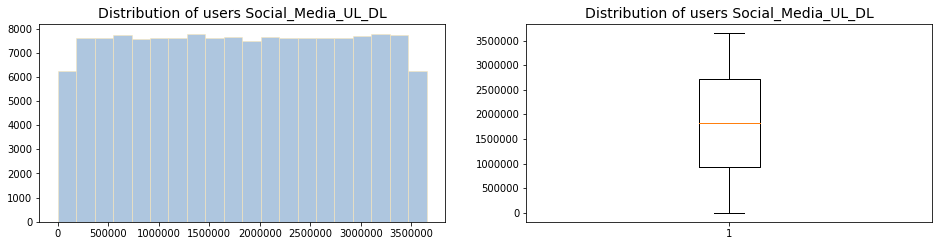

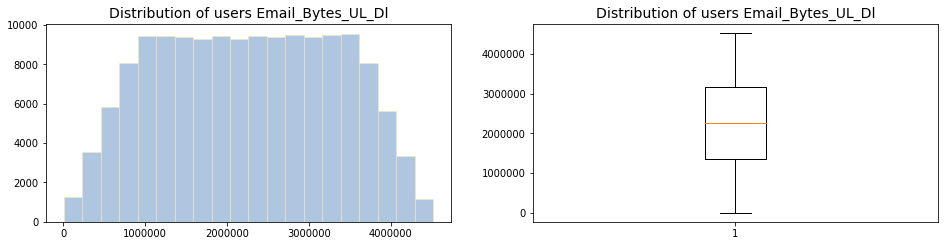

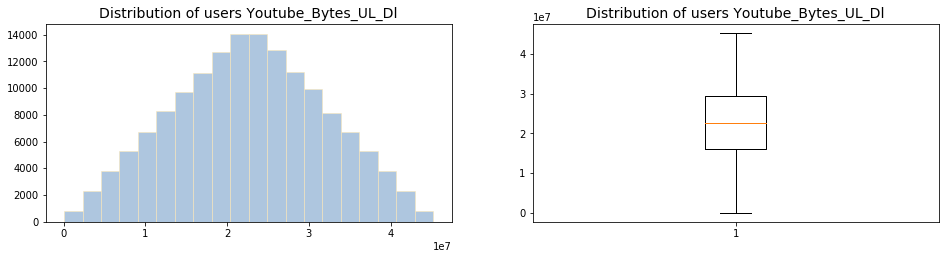

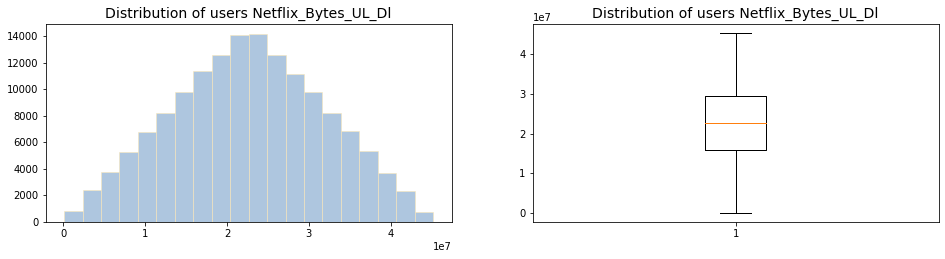

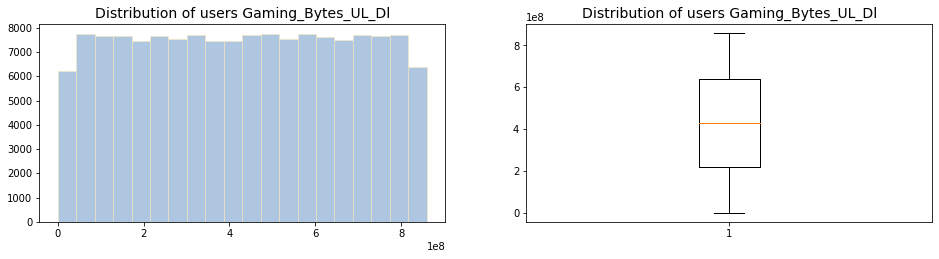

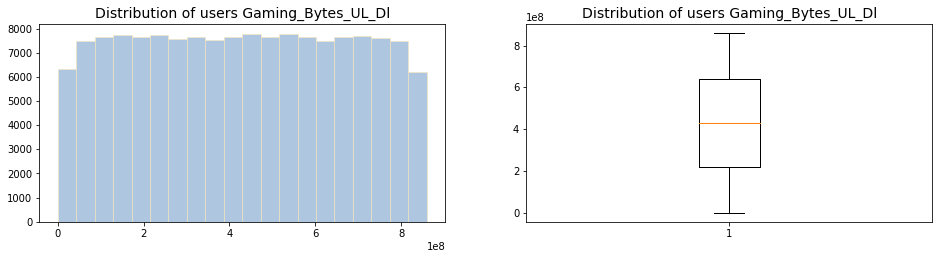

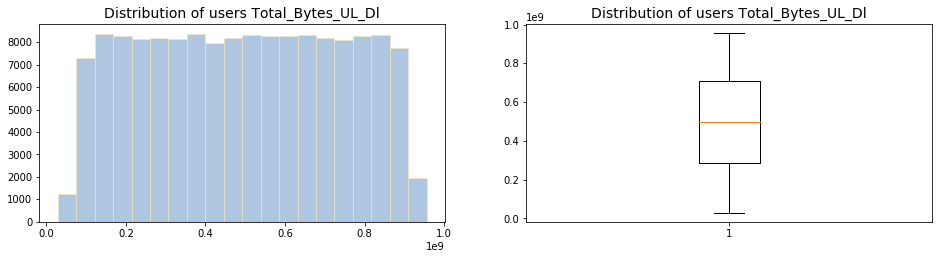

In [24]:
#before fixing outliers
uivariate_plot(df1['Social_Media_UL_Dl'],'Distribution of users Social_Media_UL_DL')
uivariate_plot(df1['Email_Bytes_UL_Dl'],'Distribution of users Email_Bytes_UL_Dl')
uivariate_plot(df1['Youtube_Bytes_UL_Dl'],'Distribution of users Youtube_Bytes_UL_Dl')
uivariate_plot(df1['Netflix_Bytes_UL_Dl'],'Distribution of users Netflix_Bytes_UL_Dl')
uivariate_plot(df1['Gaming_Bytes_UL_Dl'],'Distribution of users Gaming_Bytes_UL_Dl')
uivariate_plot(df1['Other_Bytes_UL_Dl'],'Distribution of users Gaming_Bytes_UL_Dl')
uivariate_plot(df1['Total_Bytes_UL_Dl'],'Distribution of users Total_Bytes_UL_Dl')

In [25]:
#fix outliers
def fix_outlier(df1):
    columns = df1.columns.to_list()
    subcol=['Bearer Id','Start','End','IMSI','MSISDN/Number','IMEI','Last Location Name','Handset Manufacturer','Handset Type']
    for i in columns:
        if i not in subcol:
            df1[i] = np.where(df1[i] > df1[i].quantile(0.95), df1[i].median(),df1[i])
fix_outlier(df1)

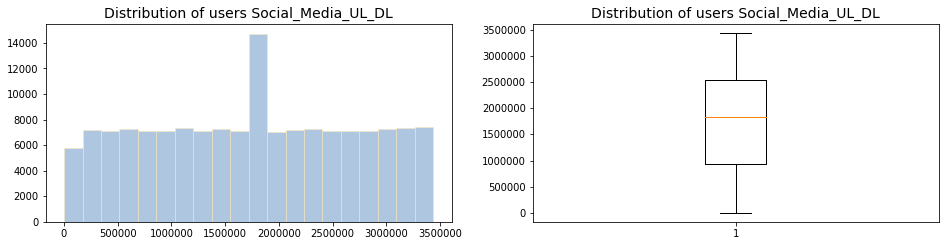

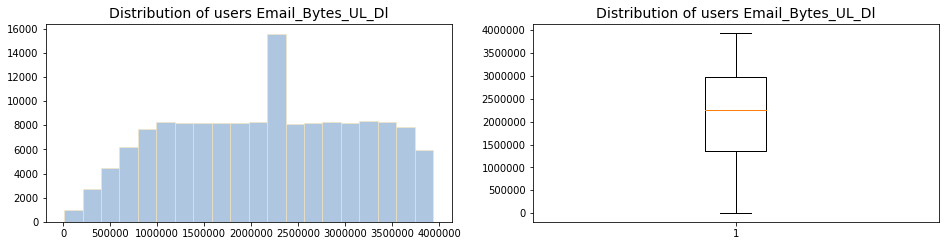

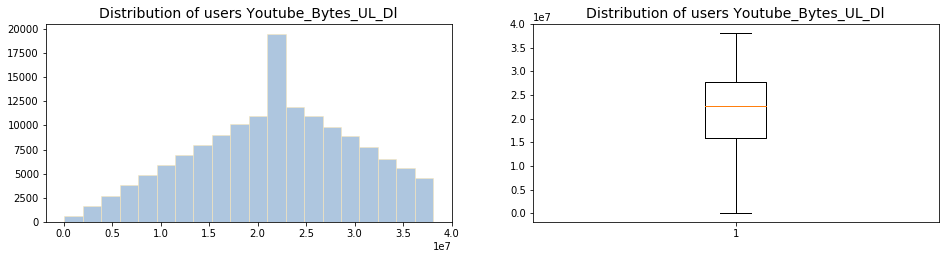

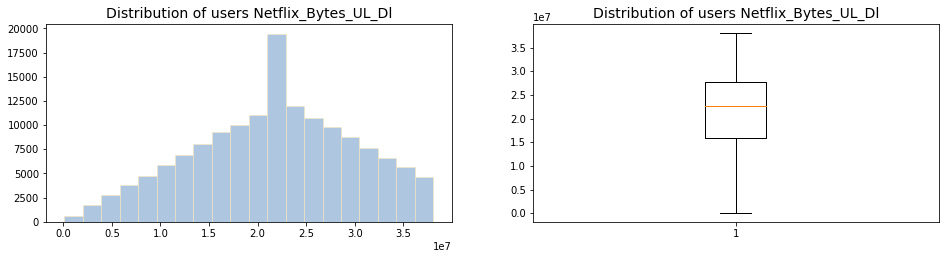

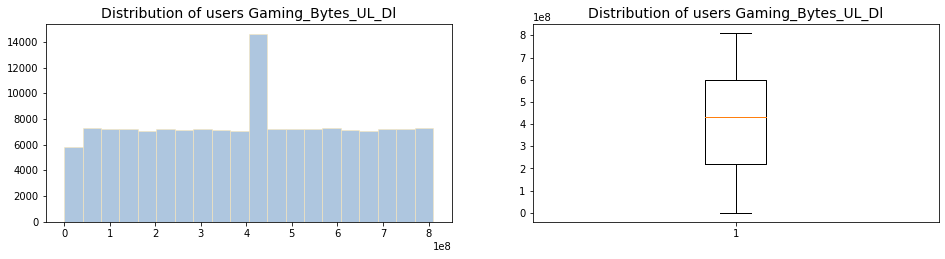

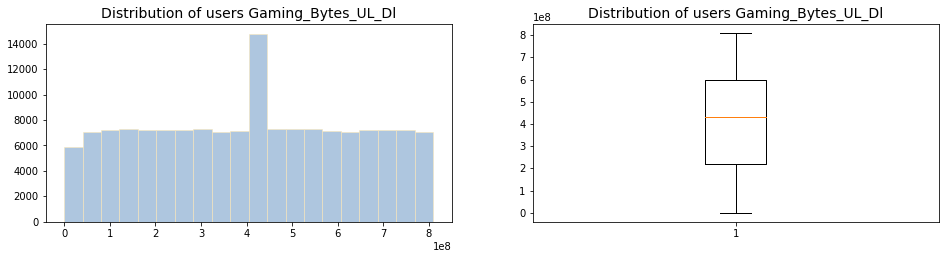

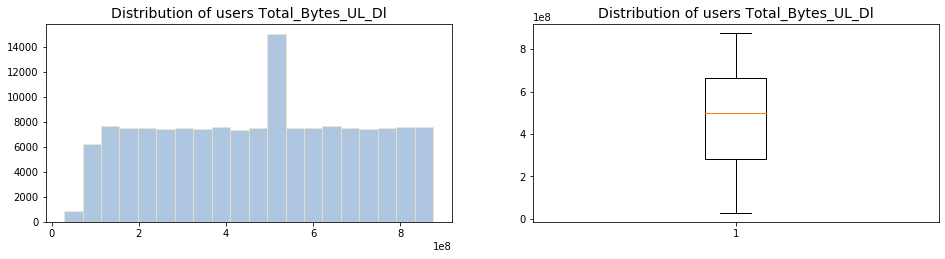

In [26]:
#after fixing outliers
uivariate_plot(df1['Social_Media_UL_Dl'],'Distribution of users Social_Media_UL_DL')
uivariate_plot(df1['Email_Bytes_UL_Dl'],'Distribution of users Email_Bytes_UL_Dl')
uivariate_plot(df1['Youtube_Bytes_UL_Dl'],'Distribution of users Youtube_Bytes_UL_Dl')
uivariate_plot(df1['Netflix_Bytes_UL_Dl'],'Distribution of users Netflix_Bytes_UL_Dl')
uivariate_plot(df1['Gaming_Bytes_UL_Dl'],'Distribution of users Gaming_Bytes_UL_Dl')
uivariate_plot(df1['Other_Bytes_UL_Dl'],'Distribution of users Gaming_Bytes_UL_Dl')
uivariate_plot(df1['Total_Bytes_UL_Dl'],'Distribution of users Total_Bytes_UL_Dl')

# bivariate analysis

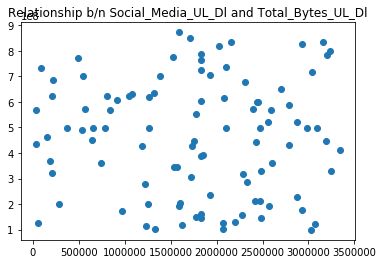

In [27]:
def bivariate_plot(df,col,title):
    plt.scatter(df[col],df['Total_Bytes_UL_Dl'],)
    plt.title(title)
bivariate_plot(df1.head(100),'Social_Media_UL_Dl','Relationship b/n Social_Media_UL_Dl and Total_Bytes_UL_Dl')

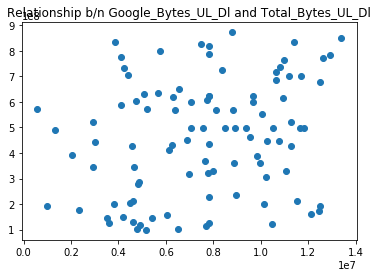

In [28]:
bivariate_plot(df1.head(100),'Google_Bytes_UL_Dl','Relationship b/n Google_Bytes_UL_Dl and Total_Bytes_UL_Dl')

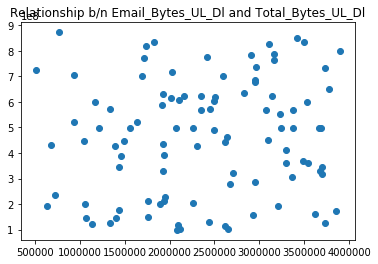

In [29]:
bivariate_plot(df1.head(100),'Email_Bytes_UL_Dl','Relationship b/n Email_Bytes_UL_Dl and Total_Bytes_UL_Dl')


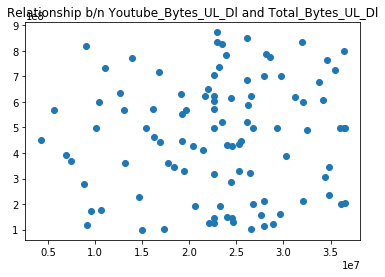

In [30]:
bivariate_plot(df1.head(100),'Youtube_Bytes_UL_Dl','Relationship b/n Youtube_Bytes_UL_Dl and Total_Bytes_UL_Dl')


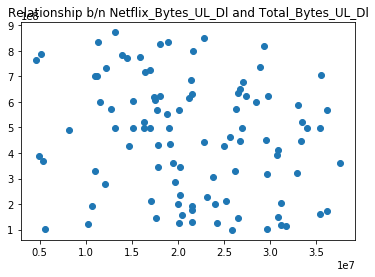

In [31]:
bivariate_plot(df1.head(100),'Netflix_Bytes_UL_Dl','Relationship b/n Netflix_Bytes_UL_Dl and Total_Bytes_UL_Dl')


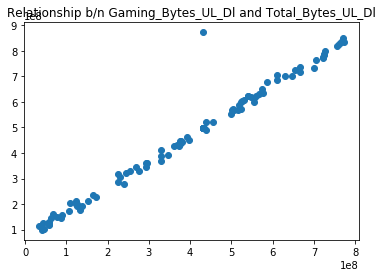

In [32]:
bivariate_plot(df1.head(100),'Gaming_Bytes_UL_Dl','Relationship b/n Gaming_Bytes_UL_Dl and Total_Bytes_UL_Dl')


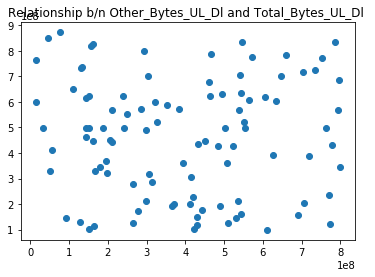

In [33]:
bivariate_plot(df1.head(100),'Other_Bytes_UL_Dl','Relationship b/n Other_Bytes_UL_Dl and Total_Bytes_UL_Dl ')

In [34]:
#correlation matrix
columns=['Social_Media_UL_Dl', 'Google_Bytes_UL_Dl','Email_Bytes_UL_Dl','Email_Bytes_UL_Dl','Youtube_Bytes_UL_Dl',
 'Netflix_Bytes_UL_Dl','Gaming_Bytes_UL_Dl', 'Other_Bytes_UL_Dl']
df1[columns].corr()

,Social_Media_UL_Dl,Google_Bytes_UL_Dl,Email_Bytes_UL_Dl,Email_Bytes_UL_Dl,Youtube_Bytes_UL_Dl,Netflix_Bytes_UL_Dl,Gaming_Bytes_UL_Dl,Other_Bytes_UL_Dl
Social_Media_UL_Dl,1.000000,-0.001931,0.003630,0.003630,0.000385,0.000825,-0.000631,0.006784
Google_Bytes_UL_Dl,-0.001931,1.000000,0.000416,0.000416,0.000693,-0.001678,-0.000845,-0.000781
Email_Bytes_UL_Dl,0.003630,0.000416,1.000000,1.000000,-0.002521,0.000724,0.001327,-0.002129
Email_Bytes_UL_Dl,0.003630,0.000416,1.000000,1.000000,-0.002521,0.000724,0.001327,-0.002129
Youtube_Bytes_UL_Dl,0.000385,0.000693,-0.002521,-0.002521,1.000000,0.000040,-0.004831,0.004714
Netflix_Bytes_UL_Dl,0.000825,-0.001678,0.000724,0.000724,0.000040,1.000000,-0.003214,-0.008387
Gaming_Bytes_UL_Dl,-0.000631,-0.000845,0.001327,0.001327,-0.004831,-0.003214,1.000000,0.000762
Other_Bytes_UL_Dl,0.006784,-0.000781,-0.002129,-0.002129,0.004714,-0.008387,0.000762,1.000000


# Task 2-User Engagement analysis
## Task 2.1

In [35]:
#Aggregate sessions frequency, duration of the session and sessions total traffic (download and upload (bytes))per customer id (MSISDN)
eng_df=df1.groupby(['MSISDN/Number']).agg({'Bearer Id':'count', 'Dur. (ms)':'sum', 'Total_Bytes_UL_Dl':'sum'}).reset_index()

eng_df.rename(columns={'Bearer Id':'sessions frequency'},inplace=True)
eng_df.head() 

,MSISDN/Number,sessions frequency,Dur. (ms),Total_Bytes_UL_Dl
0,3.360100e+10,1,116720.0,4.968610e+08
1,3.360100e+10,1,181230.0,1.568596e+08
2,3.360100e+10,1,134969.0,5.959665e+08
3,3.360101e+10,1,49878.0,4.223207e+08
4,3.360101e+10,2,37104.0,1.457411e+09


In [60]:
#top 10 customers per sessions frequency
eng_df.sort_values(['sessions frequency'], ascending=False).head(10)

,sessions frequency,Dur. (ms),Total_Bytes_UL_Dl,cluster
13526,1084,6.570807e+07,5.172918e+11,1
13180,17,1.599052e+06,7.708153e+09,2
6437,17,1.678397e+06,7.601873e+09,2
37052,16,1.905478e+06,6.932144e+09,2
92923,15,1.651084e+06,8.514774e+09,2
76363,15,1.745131e+06,7.891111e+09,2
65118,13,1.209703e+06,5.618394e+09,2
13994,12,1.195340e+06,5.754731e+09,2
1279,12,1.193033e+06,5.081521e+09,2
92577,12,1.248477e+06,5.901984e+09,2


In [61]:
#top 10 customers per session duration 
eng_df.sort_values(['Dur. (ms)'], ascending=False).head(10)

,sessions frequency,Dur. (ms),Total_Bytes_UL_Dl,cluster
13526,1084,6.570807e+07,5.172918e+11,1
37052,16,1.905478e+06,6.932144e+09,2
35436,11,1.747994e+06,4.658437e+09,2
76363,15,1.745131e+06,7.891111e+09,2
6437,17,1.678397e+06,7.601873e+09,2
92923,15,1.651084e+06,8.514774e+09,2
13180,17,1.599052e+06,7.708153e+09,2
106137,12,1.427807e+06,5.622232e+09,2
57241,11,1.334982e+06,6.472724e+09,2
1648,9,1.322251e+06,4.352684e+09,2


In [62]:
#top 10 customers per sessions total traffic (download and upload (bytes))
eng_df.sort_values(['Total_Bytes_UL_Dl'], ascending=False).head(10)

,sessions frequency,Dur. (ms),Total_Bytes_UL_Dl,cluster
13526,1084,6.570807e+07,5.172918e+11,1
92923,15,1.651084e+06,8.514774e+09,2
76363,15,1.745131e+06,7.891111e+09,2
13180,17,1.599052e+06,7.708153e+09,2
6437,17,1.678397e+06,7.601873e+09,2
37052,16,1.905478e+06,6.932144e+09,2
63028,11,1.168703e+06,6.530860e+09,2
57241,11,1.334982e+06,6.472724e+09,2
86455,11,1.052303e+06,6.149692e+09,2
30715,10,1.173433e+06,6.051459e+09,2


In [63]:
eng_df.describe()

,sessions frequency,Dur. (ms),Total_Bytes_UL_Dl,cluster
count,106856.000000,1.068560e+05,1.068560e+05,106856.000000
mean,1.403768,1.286553e+05,6.677026e+08,0.242560
std,3.408147,2.243783e+05,1.647394e+09,0.652901
min,1.000000,7.142000e+03,3.324901e+07,0.000000
25%,1.000000,7.130800e+04,3.585499e+08,0.000000
50%,1.000000,9.686250e+04,5.812662e+08,0.000000
75%,2.000000,1.691270e+05,8.169119e+08,0.000000
max,1084.000000,6.570807e+07,5.172918e+11,2.000000


In [65]:
#Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import sklearn.cluster as cluster

k = 3
cols_to_standardize = ['sessions frequency','Dur. (ms)','Total_Bytes_UL_Dl']
data_to_standardize = eng_df[cols_to_standardize]

# Create the scaler.
scaler = StandardScaler().fit(data_to_standardize)

# Standardize the data
standardized_data = eng_df.copy()
standardized_columns = scaler.transform(data_to_standardize)
standardized_data[cols_to_standardize] = standardized_columns

print('Sample of data to use:')
print(standardized_data.sample(5), '\n')

model = KMeans(n_clusters = k).fit(standardized_data)

eng_df['cluster'] = model.predict(standardized_data)

print('Cluster summary:')
summary = eng_df.groupby(['cluster']).mean()
summary['count'] = eng_df['cluster'].value_counts()
summary = summary.sort_values(by='count', ascending=False)
print(summary)

Sample of data to use:
        sessions frequency  Dur. (ms)  Total_Bytes_UL_Dl  cluster
69702            -0.118472  -0.153381           0.113408        0
60319             0.468360   0.581796           0.529777        2
1870             -0.118472  -0.452757          -0.243256        0
11522            -0.118472  -0.393727          -0.184684        0
105762            0.468360   1.353451           0.235324        2 

Cluster summary:
         sessions frequency     Dur. (ms)  Total_Bytes_UL_Dl  count
cluster                                                            
0                  1.175471  1.002186e+05       5.537004e+08  93896
2                  2.974381  3.296360e+05       1.453853e+09  12959
1               1084.000000  6.570807e+07       5.172918e+11      1


In [89]:
#top 10 most engaged users per application
columns=['Social_Media_UL_Dl', 'Google_Bytes_UL_Dl','Email_Bytes_UL_Dl','Youtube_Bytes_UL_Dl',
 'Netflix_Bytes_UL_Dl','Gaming_Bytes_UL_Dl', 'Other_Bytes_UL_Dl']
def top10_per_App(df,col):
    top10_per_App=df.groupby('MSISDN/Number').agg({col:'sum'})
    top10_per_App.sort_values(by=col, ascending=False)
    return top10_per_App.head(10)


In [90]:
# total traffic per application for Social_Media
top10_per_App(df1,columns[0])


,Social_Media_UL_Dl
MSISDN/Number,
3.360100e+10,2232135.0
3.360100e+10,2660565.0
3.360100e+10,3195623.0
3.360101e+10,280294.0
3.360101e+10,2912542.0
3.360101e+10,3792912.0
3.360101e+10,2769627.0
3.360101e+10,1782692.0
3.360101e+10,5288685.0


In [91]:
# total traffic per application for Google
top10_per_App(df1,columns[1])


,Google_Bytes_UL_Dl
MSISDN/Number,
3.360100e+10,4389005.0
3.360100e+10,5334863.0
3.360100e+10,3443126.0
3.360101e+10,9678493.0
3.360101e+10,18499616.0
3.360101e+10,15263134.0
3.360101e+10,10196403.0
3.360101e+10,12023614.0
3.360101e+10,14134211.0


In [92]:
# total traffic per application for Email
top10_per_App(df1,columns[2])


,Email_Bytes_UL_Dl
MSISDN/Number,
3.360100e+10,1331362.0
3.360100e+10,3307781.0
3.360100e+10,3205380.0
3.360101e+10,2284670.0
3.360101e+10,3305469.0
3.360101e+10,6076353.0
3.360101e+10,1358959.0
3.360101e+10,2215563.0
3.360101e+10,4599825.0


In [93]:
# total traffic per application for Youtube
top10_per_App(df1,columns[3])


,Youtube_Bytes_UL_Dl
MSISDN/Number,
3.360100e+10,21624548.0
3.360100e+10,12432223.0
3.360100e+10,21333570.0
3.360101e+10,6977321.0
3.360101e+10,41533002.0
3.360101e+10,34347122.0
3.360101e+10,26431335.0
3.360101e+10,18892740.0
3.360101e+10,63443802.0


In [96]:
# total traffic per application for Netflix
top10_per_App(df1,columns[4])

,Netflix_Bytes_UL_Dl
MSISDN/Number,
3.360100e+10,27180981.0
3.360100e+10,11221763.0
3.360100e+10,19353900.0
3.360101e+10,1942092.0
3.360101e+10,49201724.0
3.360101e+10,30315501.0
3.360101e+10,45812397.0
3.360101e+10,15292840.0
3.360101e+10,35850937.0


In [94]:
# total traffic per application for Gaming
top10_per_App(df1,columns[5])


,Gaming_Bytes_UL_Dl
MSISDN/Number,
3.360100e+10,4.316150e+08
3.360100e+10,1.197501e+08
3.360100e+10,5.388277e+08
3.360101e+10,3.911261e+08
3.360101e+10,1.314798e+09
3.360101e+10,5.116358e+08
3.360101e+10,5.484611e+08
3.360101e+10,2.823644e+08
3.360101e+10,8.330880e+08


In [97]:
# total traffic per application for Other
top10_per_App(df1,columns[6])


,Other_Bytes_UL_Dl
MSISDN/Number,
3.360100e+10,3.865709e+08
3.360100e+10,2.817101e+08
3.360100e+10,5.016937e+08
3.360101e+10,3.527970e+07
3.360101e+10,8.048045e+08
3.360101e+10,4.923728e+08
3.360101e+10,2.248887e+08
3.360101e+10,1.782015e+08
3.360101e+10,1.041883e+09


In [126]:
#top 3 most used applications
apps=['Social_Media_UL_Dl', 'Google_Bytes_UL_Dl','Email_Bytes_UL_Dl','Youtube_Bytes_UL_Dl',
 'Netflix_Bytes_UL_Dl','Gaming_Bytes_UL_Dl', 'Other_Bytes_UL_Dl']
total_usage={}
top_apps={}
for i in apps:
    total_usage[i]=df1[i].sum()
sort_orders = sorted(total_usage.items(), key=lambda x: x[1], reverse=True)
for i in sort_orders:
    if len(top_apps.keys())<3:
        top_apps[i[0]]=i[1]
    else:break
top_apps        

{'Gaming_Bytes_UL_Dl': 61554389701882.7,
 'Other_Bytes_UL_Dl': 61400457297135.62,
 'Youtube_Bytes_UL_Dl': 3262897043837.6387}

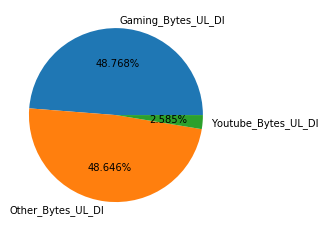

In [129]:
plt.pie(top_apps.values(), labels=top_apps.keys(), autopct='%1.3f%%')
plt.show()

# Task 3 - Experience Analytics

## Task 3. 1

In [80]:
df_clean.sample()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),TCP_retransmission
77422,7277825663886829568,2019-04-27 02:11:02,389.0,2019-04-28 02:11:02,366.0,86399.0,2.082018e+14,3.366436e+10,8.637690e+13,D93312A,63.0,28.0,33829.0,1128.0,654906.0,84510.0,82.0,4.0,5.0,7.0,99.0,0.0,0.0,0.0,4930494.0,386209.0,5964978.0,4887798.0,86399977.0,Huawei,Huawei B528S-23A,1301.0,91.0,1030.0,149.257052,837.0,2.0,15294.0,14698.0,3375532.0,49845.0,7728100.0,507249.0,1709059.0,87904.0,8928455.0,11013447.0,16979382.0,8622971.0,248780169.0,680566.0,7156691.0,4088188.0,35514701.0,287500697.0,739416.0


In [95]:
df_clean['TCP_retransmission']=df_clean['TCP DL Retrans. Vol (Bytes)']+df_clean['TCP UL Retrans. Vol (Bytes)']
df_clean['Total_RTT']=df_clean['Avg RTT DL (ms)']+df_clean['Avg RTT UL (ms)']
df_clean["Total_Throughput"]=df_clean['DL TP < 50 Kbps (%)']+df_clean['50 Kbps < DL TP < 250 Kbps (%)']+df_clean['250 Kbps < DL TP < 1 Mbps (%)']+df_clean['DL TP > 1 Mbps (%)']+df_clean['UL TP < 10 Kbps (%)']+df_clean['10 Kbps < UL TP < 50 Kbps (%)']+df_clean['50 Kbps < UL TP < 300 Kbps (%)']+df_clean['UL TP > 300 Kbps (%)']

In [135]:
#Aggregate per customer Average TCP retransmission 
Average_TCP_retransmission=df_clean.groupby(['MSISDN/Number']).TCP_retransmission.mean()
Average_TCP_retransmission.head()

MSISDN/Number  Handset Type                  
3.360100e+10   Huawei P20 Lite Huawei Nova 3E    2.156957e+07
               Apple iPhone 7 (A1778)            2.156957e+07
               undefined                         2.156957e+07
3.360101e+10   Apple iPhone 5S (A1457)           7.607247e+05
               Apple iPhone Se (A1723)           1.547020e+07
Name: TCP_retransmission, dtype: float64

In [101]:
#Aggregate per customer  Average RTT 
df_clean.groupby('MSISDN/Number').Total_RTT.mean().head()
Average_RTT

MSISDN/Number
3.360100e+10     46.000000
3.360100e+10     31.000000
3.360100e+10    127.458589
3.360101e+10     84.000000
3.360101e+10     59.500000
Name: Total_RTT, dtype: float64

In [114]:
#Aggregate per customer Average throughput
df_clean.groupby('MSISDN/Number').Total_Throughput.mean().head()

MSISDN/Number
3.360100e+10    200.0
3.360100e+10    200.0
3.360100e+10    200.0
3.360101e+10    200.0
3.360101e+10    175.5
Name: Total_Throughput, dtype: float64

In [125]:
df_clean

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),TCP_retransmission,Total_RTT,Total_Throughput
0,13114483460844900352,2019-04-04 12:01:18,770.0000,2019-04-25 14:35:31,662.00000,86399.000000,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.000000,5.000000,23.000000,44.000000,2.080991e+07,759658.664811,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.0,0.0,1.144710e+08,3.242301e+06,3.762400e+04,3.878700e+04,8.639998e+07,Samsung,Samsung Galaxy A5 Sm-A520F,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,213.000000,214.000000,1.545765e+06,24420.00000,1.634479e+06,1.271433e+06,1.793505e+06,137762.00000,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08,2.156957e+07,47.000000,200.000000
1,13114483482878900224,2019-04-09 13:04:04,235.0000,2019-04-25 08:15:48,606.00000,86399.000000,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.000000,5.000000,16.000000,26.000000,2.080991e+07,759658.664811,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.0,0.0,1.144710e+08,3.242301e+06,1.680000e+02,3.560000e+03,8.639998e+07,Samsung,Samsung Galaxy J5 (Sm-J530),989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,971.000000,1022.000000,1.926113e+06,7165.00000,3.493924e+06,9.201720e+05,6.290460e+05,308339.00000,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08,2.156957e+07,70.000000,200.000000
2,13114483484080500736,2019-04-09 17:42:11,1.0000,2019-04-25 11:58:13,652.00000,86399.000000,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,109.795706,17.662883,6.000000,9.000000,2.080991e+07,759658.664811,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.0,0.0,1.144710e+08,3.242301e+06,0.000000e+00,0.000000e+00,8.639998e+07,Samsung,Samsung Galaxy A8 (2018),989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,751.000000,695.000000,1.684053e+06,42224.00000,8.535055e+06,1.694064e+06,2.690151e+06,672973.00000,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08,2.156957e+07,127.458589,200.000000
3,13114483485442799616,2019-04-10 00:31:25,486.0000,2019-04-25 07:36:35,171.00000,86399.000000,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,109.795706,17.662883,44.000000,44.000000,2.080991e+07,759658.664811,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.0,0.0,1.144710e+08,3.242301e+06,3.330000e+03,3.788200e+04,8.639998e+07,undefined,undefined,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,17.000000,207.000000,6.441210e+05,13372.00000,9.023734e+06,2.788027e+06,1.439754e+06,631229.00000,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,4.558409e+08,2.156957e+07,127.458589,200.000000
4,1311448349

## Task 3.2

In [129]:
df_clean['TCP DL Retrans. Vol (Bytes)'].value_counts().head(10)

2.080991e+07    93254
1.330000e+03      433
2.660000e+03      219
3.800000e+01      200
9.200000e+01      192
1.318000e+03      156
5.430000e+02      133
3.990000e+03      114
7.600000e+01      108
5.320000e+03      102
Name: TCP DL Retrans. Vol (Bytes), dtype: int64

In [130]:
df_clean['TCP UL Retrans. Vol (Bytes)'].value_counts().head(10)

759658.664811    99354
1330.000000       1910
2660.000000        937
1294.000000        651
3990.000000        548
1318.000000        545
5320.000000        366
6650.000000        271
2636.000000        234
7980.000000        219
Name: TCP UL Retrans. Vol (Bytes), dtype: int64

In [131]:
df_clean['TCP DL Retrans. Vol (Bytes)'].value_counts().tail(10)

475272.0     1
1376785.0    1
475266.0     1
2689.0       1
475263.0     1
344190.0     1
3802081.0    1
3802074.0    1
1376741.0    1
82942.0      1
Name: TCP DL Retrans. Vol (Bytes), dtype: int64

In [132]:
df_clean['TCP UL Retrans. Vol (Bytes)'].value_counts().tail(10)

42717.0     1
42718.0     1
40262.0     1
13518.0     1
85439.0     1
170881.0    1
236419.0    1
42721.0     1
12971.0     1
3057.0      1
Name: TCP UL Retrans. Vol (Bytes), dtype: int64